In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('Flight_Booking.csv')
print(df)

        Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.shape

(300153, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


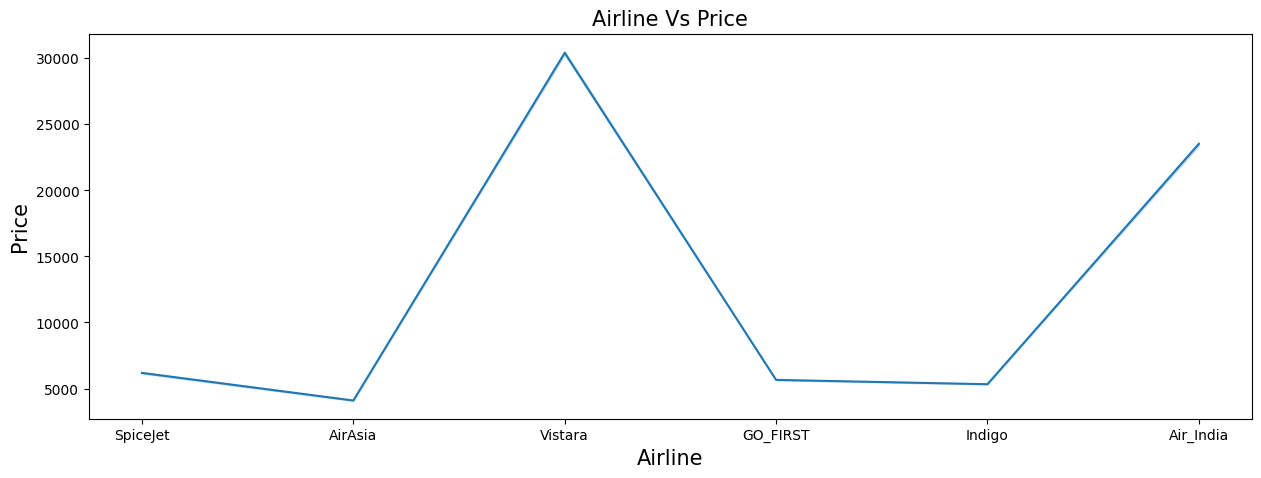

In [8]:
plt.figure(figsize = (15,5))
sns.lineplot(x = df['airline'], y = df['price'])
plt.title('Airline Vs Price', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


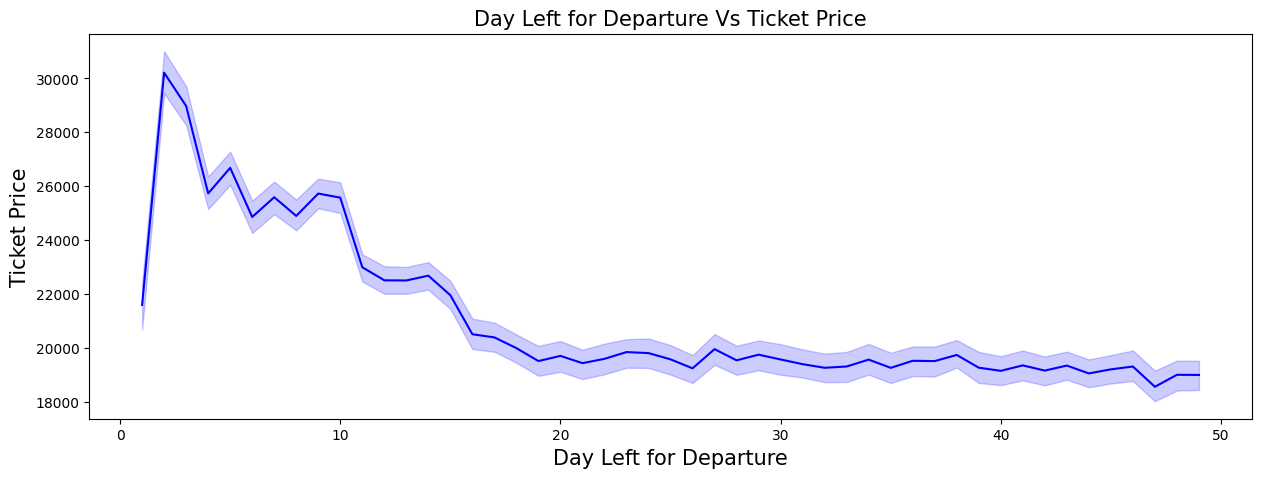

In [9]:
plt.figure(figsize=(15,5))
sns.lineplot(x = df['days_left'], y = df['price'], color = 'blue')
plt.title('Day Left for Departure Vs Ticket Price', fontsize=15)
plt.xlabel('Day Left for Departure', fontsize=15)
plt.ylabel('Ticket Price', fontsize=15)
plt.show()

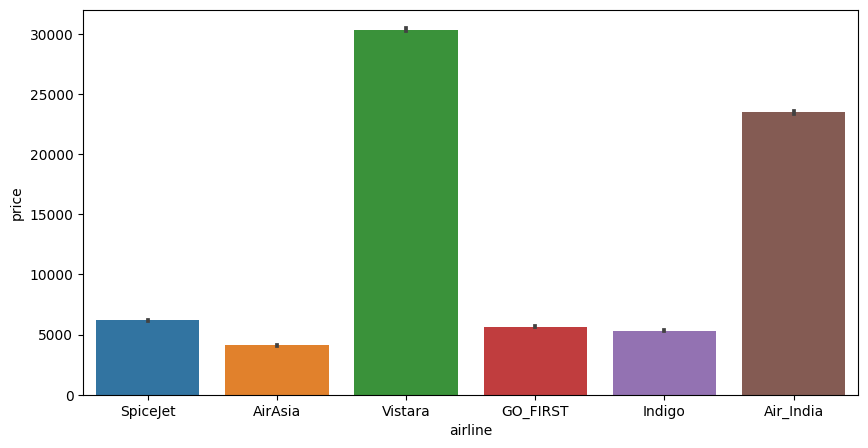

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='airline',y='price')
plt.show()

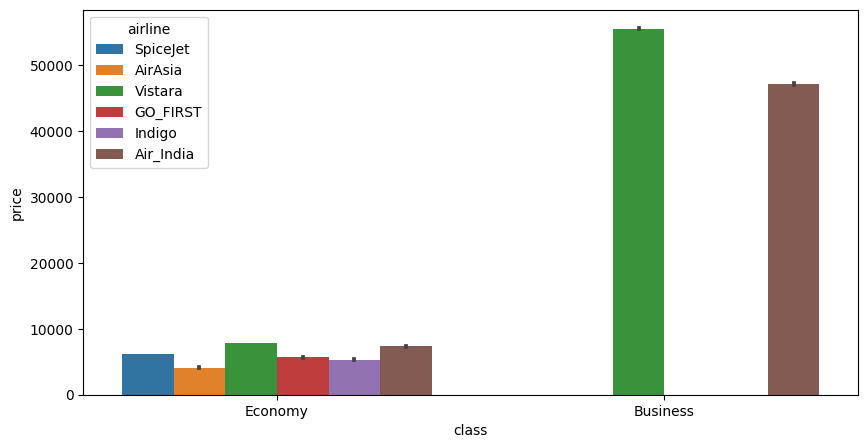

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='class',y='price',hue='airline')
plt.show()

C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

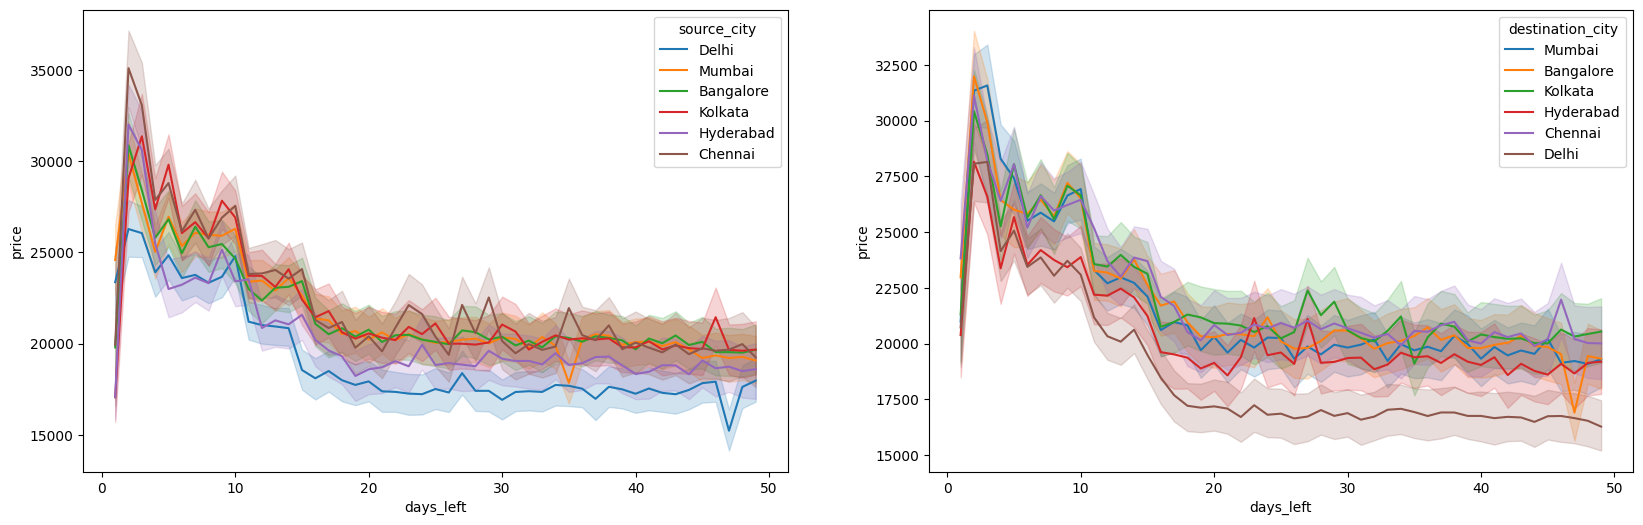

In [12]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(data=df,x='days_left',y='price',hue='source_city',ax=ax[0])
sns.lineplot(data=df,x='days_left',y='price',hue='destination_city',ax=ax[1])
plt.show()

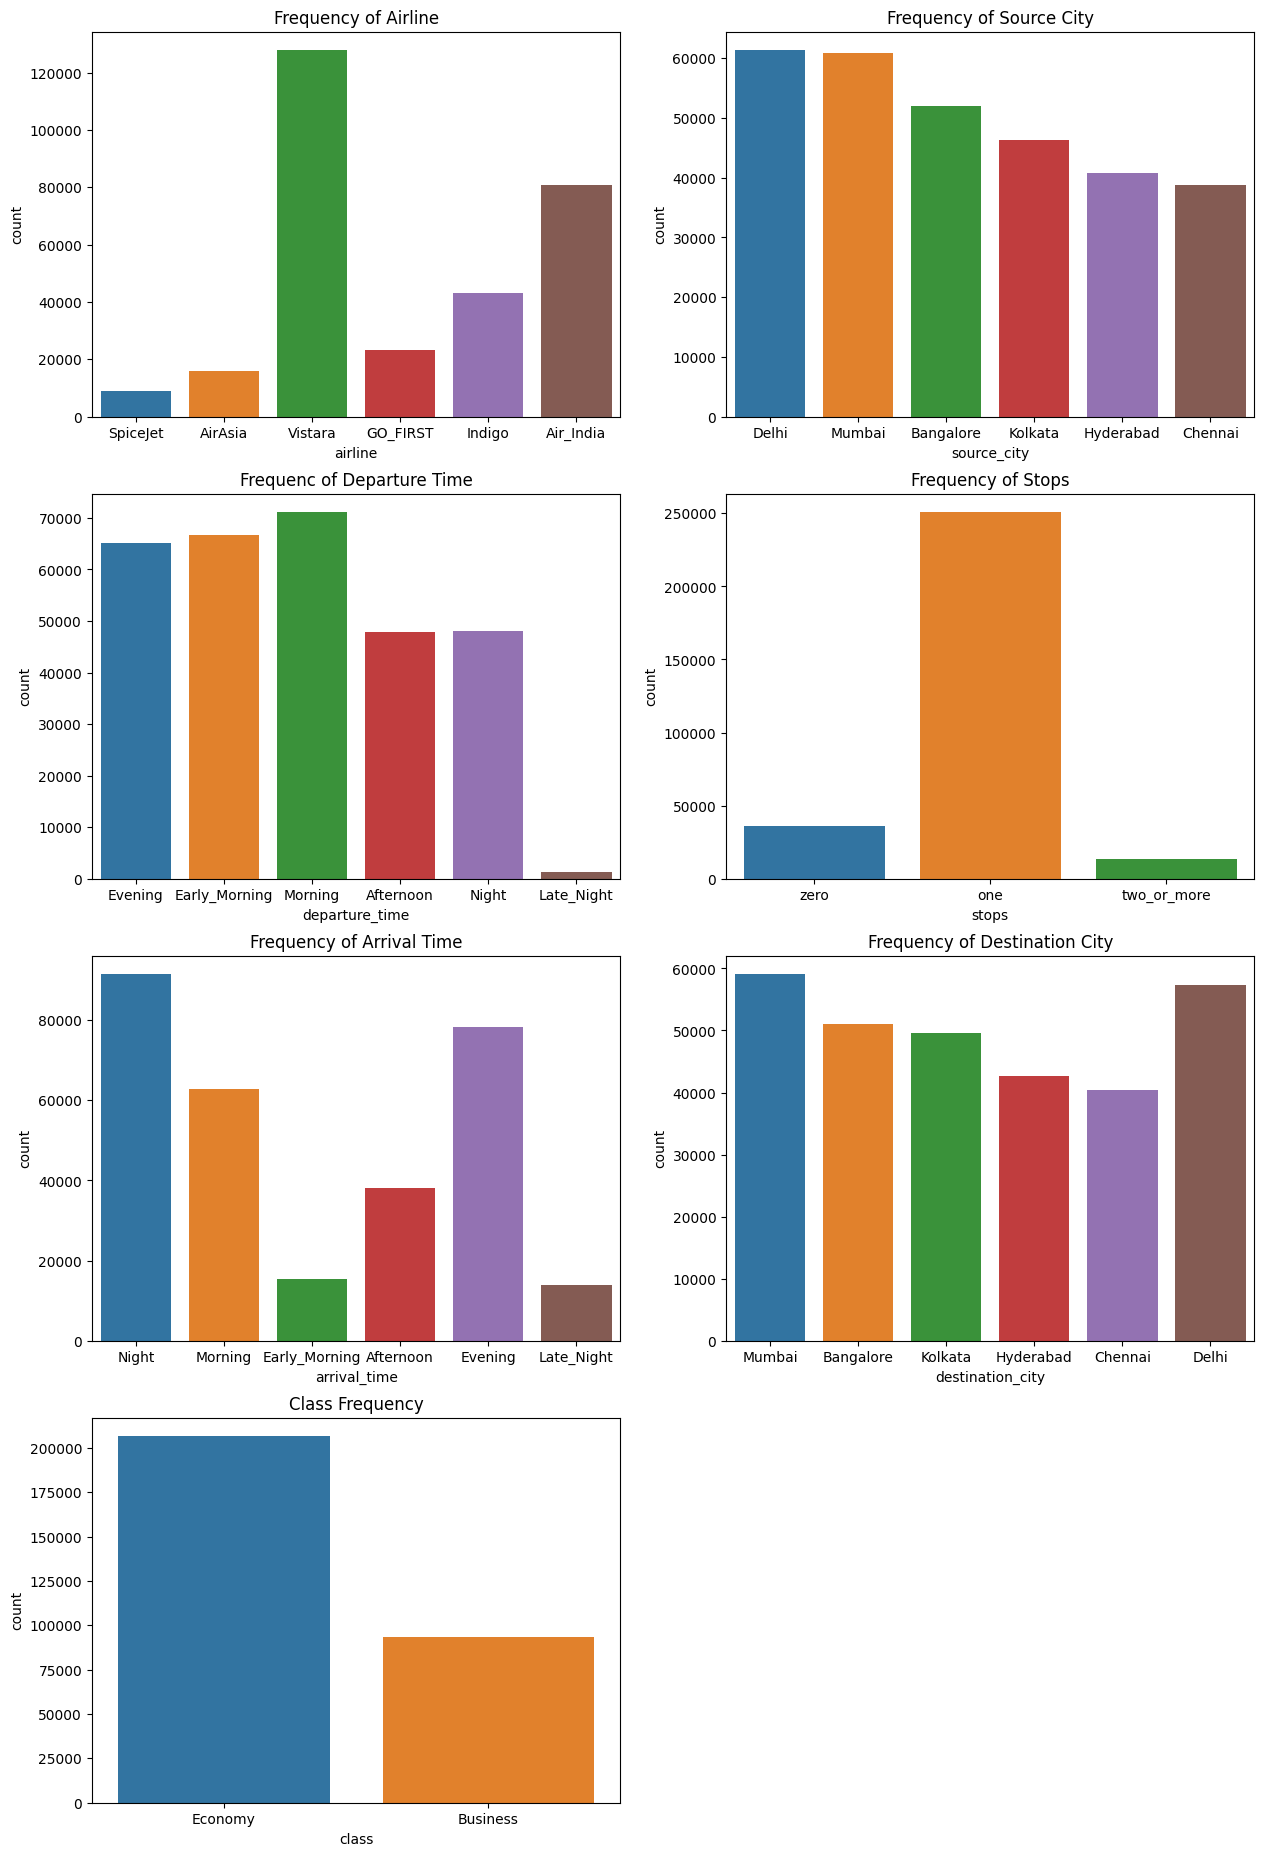

In [13]:
plt.figure(figsize=(15,23))
plt.subplot(4,2,1)
sns.countplot(x=df['airline'])
plt.title('Frequency of Airline')
plt.subplot(4,2,2)
sns.countplot(x=df['source_city'])
plt.title('Frequency of Source City')
plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'])
plt.title('Frequenc of Departure Time')
plt.subplot(4,2,4)
sns.countplot(x=df['stops'])
plt.title('Frequency of Stops')
plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'])
plt.title('Frequency of Arrival Time')
plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'])
plt.title('Frequency of Destination City')
plt.subplot(4,2,7)
sns.countplot(x=df['class'])
plt.title('Class Frequency')
plt.show()

In [14]:
le = LabelEncoder()
df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


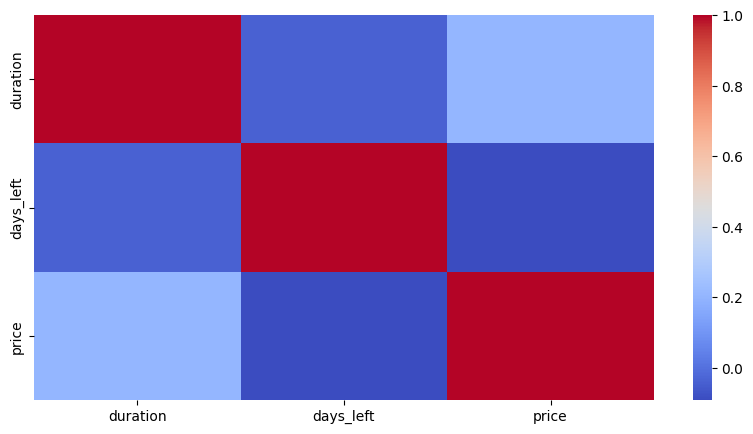

In [17]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [18]:
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [19]:
x = df.drop(columns=['flight','price'])
y = df['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred = pd.DataFrame(y_pred,columns=['Pred'])
df_pred = pd.DataFrame(columns=['Actual','Predicted'])
df_pred['Actual'] = y_test.reset_index()['price']
df_pred['Predicted'] = y_pred.reset_index()['Pred']
df_pred

,Actual,Predicted
0,7366,4572.477222
1,64831,52809.226907
2,6195,7857.626650
3,60160,56096.253996
4,6578,6656.438105
...,...,...
60026,5026,5820.248216
60027,3001,486.438325
60028,6734,5837.956605
60029,5082,-1555.511279


In [20]:
print('r2_Score:',r2_score(y_test,y_pred))
print('Mean Abs Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Abs Percentage Error:', metrics.mean_absolute_percentage_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_Score: 0.9045526175497736
Mean Abs Error: 4627.355215760295
Mean Abs Percentage Error: 0.4361448314713301
Mean Squared Error: 49201433.71164047
Root Mean Squared Error: 7014.373365571615


C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


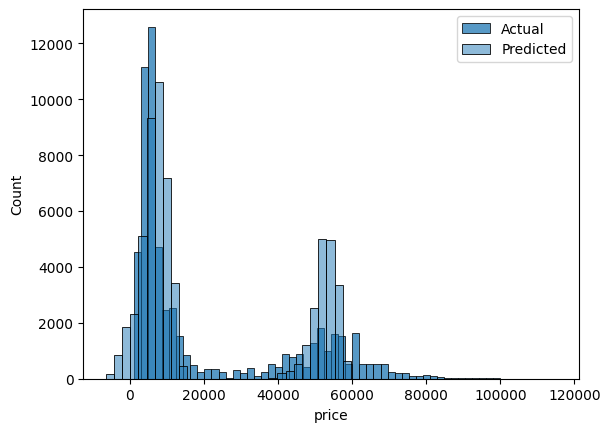

In [21]:
sns.histplot(y_test,label='Actual')
sns.histplot(y_pred,label='Predicted')
plt.legend()
plt.show()

In [22]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print('r2_Score:',r2_score(y_test,y_pred))
print('Mean Abs Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Abs Percentage Error:', metrics.mean_absolute_percentage_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_Score: 0.9722867544647505
Mean Abs Error: 1301.6377260637562
Mean Abs Percentage Error: 0.08477465677318946
Mean Squared Error: 14285686.81648278
Root Mean Squared Error: 3779.641096252762


C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


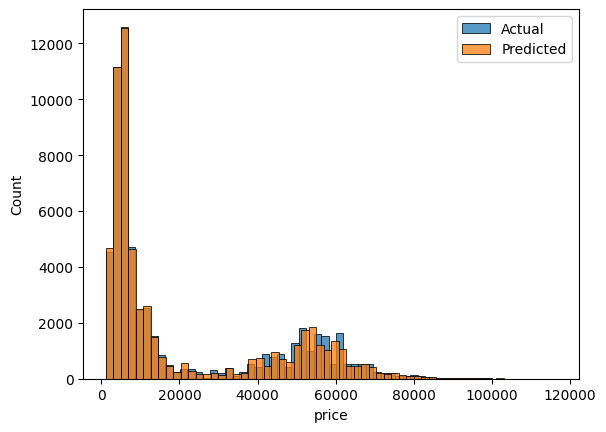

In [23]:
sns.histplot(y_test,label='Actual')
sns.histplot(y_pred,label='Predicted')
plt.legend()

In [24]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred =rfr.predict(x_test)
print('r2_Score:',r2_score(y_test,y_pred))
print('Mean Abs Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Abs Percentage Error:', metrics.mean_absolute_percentage_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_Score: 0.982708647704715
Mean Abs Error: 1194.5780122754338
Mean Abs Percentage Error: 0.07819812999011097
Mean Squared Error: 8913385.59425384
Root Mean Squared Error: 2985.529365833443


C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swaro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


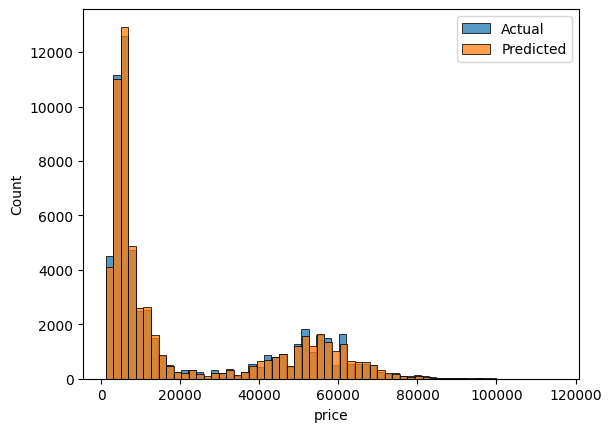

In [25]:
sns.histplot(y_test,label='Actual')
sns.histplot(y_pred,label='Predicted')
plt.legend()